## YCrCb color transform

In [1]:
from IPython.display import Image, display

In [2]:
#!pip install -r ../requirements.txt

### Help

In [3]:
!python ../src/YCrCb.py -h

usage: YCrCb.py [-h] [-g] {encode,decode} ...

Exploiting color (perceptual) redundancy with the YCrCb transform.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Encode an image
    decode         Decode an image

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [4]:
!python ../src/YCrCb.py encode -h

usage: YCrCb.py encode [-h] [-c QUANTIZER]

options:
  -h, --help            show this help message and exit
  -c QUANTIZER, --quantizer QUANTIZER
                        Quantizer (default: deadzone)


### Encoding

In [5]:
!wget http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png -O /tmp/pajarillo.png

--2025-03-09 13:16:38--  http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png
Resolving www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Connecting to www.hpca.ual.es (www.hpca.ual.es)|150.214.150.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237034 (231K) [image/png]
Saving to: ‘/tmp/pajarillo.png’

/tmp/pajarillo.png  100%[===================>] 231.48K   299KB/s    in 0.8s    

2025-03-09 13:16:39 (299 KB/s) - ‘/tmp/pajarillo.png’ saved [237034/237034]



In [6]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f01ecf1ade0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) entropy_image_coding: Written 44655 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 44656 bytes written
(INFO) entropy_image_coding: rate = 1.36279296875 bits/pixel


### Decoding

In [7]:
!python ../src/YCrCb.py decode

main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=32, func=<function decode at 0x7f004c9ca200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 44655 bytes from /tmp/encoded.TIFF
(INFO) blur: Using filter none with size 3
(INFO) entropy_image_coding: Written 45578 bytes in /tmp/decoded.png with shape (512, 512, 3) and type uint8
(INFO) entropy_image_coding: Total 44655 bytes read
(INFO) entropy_image_coding: Total 45579 bytes written
(INFO) entropy_image_coding: Read 215071 bytes from file:///tmp/original.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: Read 45578 bytes from /tmp/decoded.png with shape (512, 512, 3) and type=uint8
(INFO) entropy_image_coding: RMSE = 36.61857175343621
(INFO) entropy_image_coding: J = R + D = 37.98136472218621


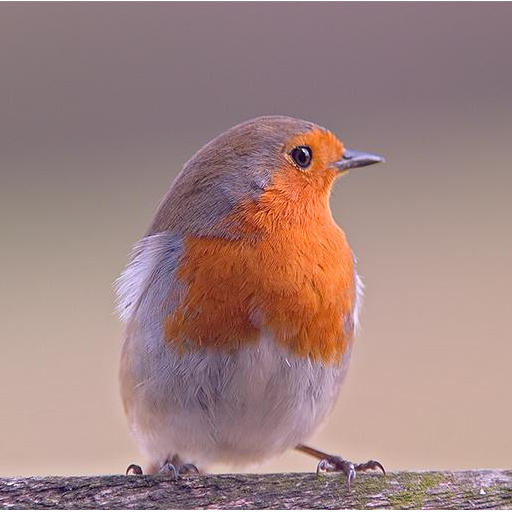

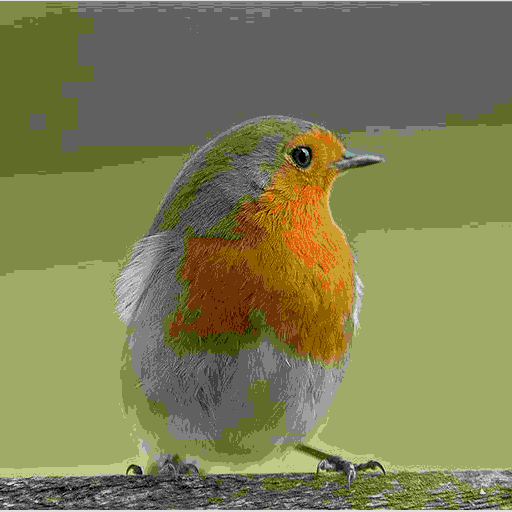

In [8]:
display(Image(filename="/tmp/pajarillo.png"))
display(Image(filename="/tmp/decoded.png"))

### Increasing QSS

main Namespace(debug=False, subparser_name='encode', quantizer='deadzone', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=128, func=<function encode at 0x7f2d6b90ede0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) entropy_image_coding: Written 21778 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 21779 bytes written
(INFO) entropy_image_coding: rate = 0.664642333984375 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='deadzone', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', QSS=128, func=<function decode at 0x7f4579bce200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png
(INFO) entropy_image_coding: Read 2

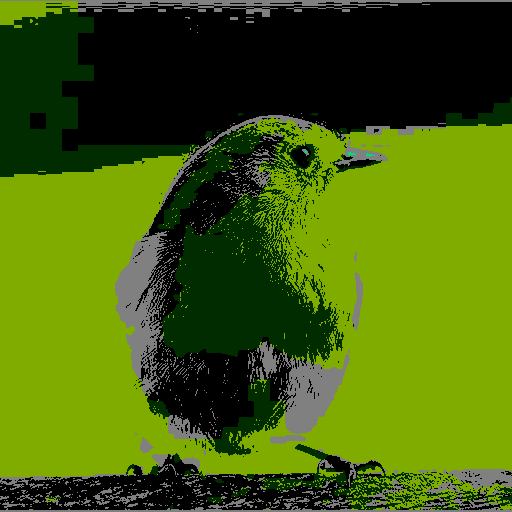

In [9]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -q 128
!python ../src/YCrCb.py decode -q 128
display(Image(filename="/tmp/decoded.png"))

### Using LloydMax quantization

main Namespace(debug=False, subparser_name='encode', quantizer='LloydMax', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', QSS=32, func=<function encode at 0x7f4edcd12de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: Written /tmp/encoded_QSS.txt
(INFO) LloydMax: histogram = [    0     0     0     0     2     1     4     6     5     8     9    11
     7    10     8     8    10    11    10    16    11    15    18    10
    20    19    20    17     5    20    17    29    26    22    39    32
    21    35    33    36    31    39    36    48    51    53    54    63
    71    74    79   106    77    85    96   113   123   123   169   157
   162   168   196   204   242   241   264   288   308   364   389   390
   420   473   406   448   480   550   588   6

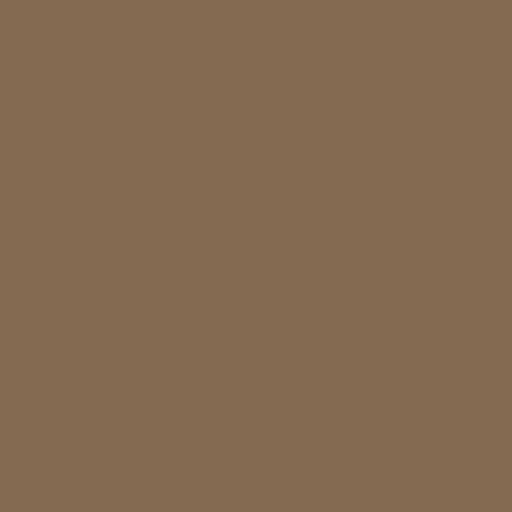

In [10]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -c LloydMax
!python ../src/YCrCb.py decode -c LloydMax
display(Image(filename="/tmp/decoded.png"))

### Using (2D) VQ

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='TIFF', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=4, N_clusters=256, func=<function encode at 0x7f4833116de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) entropy_image_coding: Written 7129 bytes in /tmp/encoded.TIFF
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 46441 bytes written
(INFO) entropy_image_coding: rate = 1.417266845703125 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='TIFF', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=4, N_clusters=256, func=<function decode at 0x7f9f241d6200>)
(INFO) main: input = /tmp/encoded
(INFO) main: output = /tmp/decoded.png


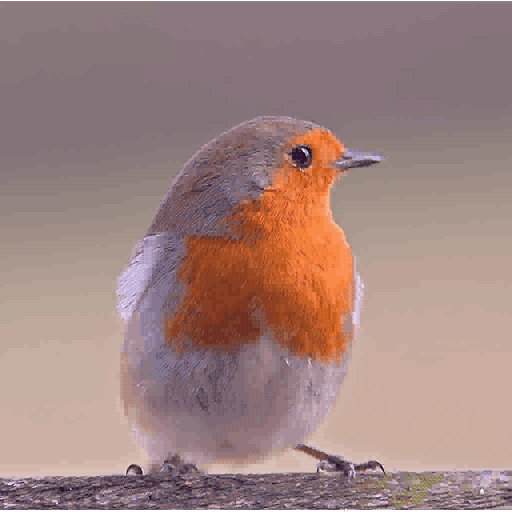

In [11]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -c VQ
!python ../src/YCrCb.py decode -c VQ
display(Image(filename="/tmp/decoded.png"))

### Using VQ and Huffman

In [12]:
!python ../src/YCrCb.py encode -i /tmp/pajarillo.png -c VQ -e Huffman
!python ../src/YCrCb.py decode -c VQ -e Huffman

main Namespace(debug=False, subparser_name='encode', quantizer='VQ', entropy_image_codec='Huffman', input='/tmp/pajarillo.png', output='/tmp/encoded', block_size_VQ=4, N_clusters=256, func=<function encode at 0x7f49ab716de0>)
(INFO) main: input = /tmp/pajarillo.png
(INFO) main: output = /tmp/encoded
(INFO) entropy_image_coding: Read 237034 bytes from /tmp/pajarillo.png with shape (512, 512, 3) and type=uint8
-----------------> uint8
(INFO) Huffman: Length of the file "/tmp/encoded_huffman_tree.pkl.gz" (Huffman tree + image shape) = 2107 bytes
(INFO) entropy_image_coding: Written 12598 bytes in /tmp/encoded.huf
(INFO) entropy_image_coding: Total 237034 bytes read
(INFO) entropy_image_coding: Total 54113 bytes written
(INFO) entropy_image_coding: rate = 1.651397705078125 bits/pixel
main Namespace(debug=False, subparser_name='decode', quantizer='VQ', entropy_image_codec='Huffman', filter='none', filter_size=3, input='/tmp/encoded', output='/tmp/decoded.png', block_size_VQ=4, N_clusters=25